<a href="https://colab.research.google.com/github/MDMohaymenUlAnam/Numerical-Methods/blob/main/Md_Mohaymen_Ul_Anam_190042142_Math_4544_B_L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 3 : Lagrangian Interpolation**<br>

Interpolation is the process of estimating unknown data that lies within the range of some known data. The **Lagrangian Interpolation** is one of the methods of performing this task. In order to interpolate unknown data, one needs to define a model that would fit the known data and based on that model, one would obtain the unknown data. This model would basically be a function that tries to satisfy the known data points. There can be various types of functions that may satisfy the same given data points, but for interpolation, we usually choose **polynomials** as interpolating functions due to the fact that polynomials are very easy to evaluate, differentiate and integrate.

In today's lab, we will be implementing the **Lagrangian Interpolation** in python. To test our implementation, we will be using the same data that we used during our class lectures. Run the following cell to load the known data points:


In [ ]:
t = [0, 10, 15, 20, 22.5, 30]
v = [0, 227.04, 362.78, 517.35, 602.97, 901.67]

##Task 1
Design a utility function that will be called in the Lagrangian function. The purpose of this function will be to find the n+1 closest points to the unknown value t_new where we want to interpolate the data, where n is the order of the interpolating polynomial. The function to be implemented is as follows:

In [ ]:
import sys

def NearestPoints(t, v, n, t_new):
  #Write your implementation here
  
   t_nearest,v_nearest = [-1]*(n+1), [-1]*(n+1)
   diffs = []
    
    
   for x in t:
     diffs.append(abs(x-t_new))
       
  
   for i in range(0,n+1):

     index_t = diffs.index(min(diffs))
     diffs[index_t] = 99999
        

     t_nearest[i] = t[index_t]
     v_nearest[i] = v[index_t]

        
   return t_nearest, v_nearest;



  

The above function is supposed to return two vectors, say t_nearest and v_nearest consisting of n+1 elements each. For testing the working of the function, we can print the data and see what we are getting. Run the following cell to check this:

In [ ]:
t = [0, 10, 15, 20, 22.5, 30]
v = [0, 227.04, 362.78, 517.35, 602.97, 901.67]

n = 1
t_new = 16

t_nearest, v_nearest = NearestPoints(t, v, n, t_new)
print(t_nearest)
print(v_nearest)

[15, 20]
[362.78, 517.35]


##Task 2
Now your task is to design a generalized function that takes the given data as parameters as well as the order (n) of the polynomial and uses the Lagrangian Polynomial to interpolate the unknown data at t_new. The function should return the array of the Lagrangian constants $L_0, L_1$ and so on. The following cell contains the function to be implemented:

In [ ]:
def Lagrangian(t_nearest, v_nearest, n, t_new):
  #Write your implementation here

  l_array = []
  for i in range(0,n+1):
 
        # Compute individual terms of above formula
      lan_total = 1
      
      for j in range(0,n+1):
          if (j != i):
              lan_total *= (t_new - t_nearest[j])/ (t_nearest[i]-t_nearest[j])
              l_array.append(lan_total)
 
       
        
  return l_array
L = Lagrangian(t_nearest, v_nearest, n, t_new)
print(L)


  


[0.8, 0.2]


Note that the above function will at first need to find a number of closest points to the unknown data (t_new), and this number will vary depending on the order (n) of the polynomial that we want to use as the interpolating function. So you will have to call the function you implemented in Task 1 inside this function. The Lagrangian constants returned by the previous function would be used by another function that evaluates the results of the unknown data based on the Lagrangian constants. For that, implement the following function:

In [ ]:
L = Lagrangian(t_nearest, v_nearest, n, t_new)
def evalLagrangian(L, v_nearest):
  #Write your implementation here
  total = 0

  for i in range(0,n+1):
    total += (L[i]*v_nearest[i])
  return total
temp = evalLagrangian(L, v_nearest)
print(temp)


393.694


##Task 3
Now, test the function using different order of polynomials, setting n = 1 to 5 and produce the absolute relative approximate error at each step and generate a graph from these values.

393.694


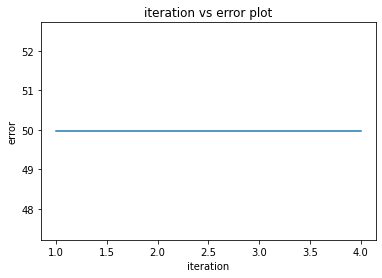

In [ ]:
#Write your code here for finding the relative approximate errors for different orders of the polynomial

import numpy as np
import matplotlib.pyplot as plt

errors = []
iter = []
valold = temp
print(valold)

for i in range(1,5):
  t_nearest, v_nearest, = NearestPoints(t,v,i+1,t_new)

  valnew = evalLagrangian(Lagrangian(t_nearest, v_nearest,i+1,t_new) ,v_nearest)
  iter.append(i)
  errors.append((abs(valnew - valold)/valnew) * 100)
  varold = valnew


plt.plot(iter,errors)
plt.title("iteration vs error plot")
plt.xlabel("iteration")
plt.ylabel("error")
plt.show()
